# The goal is to look at the subdomains of the sharepoint.com domain.

Let's first get a list of all \*-my.sharepoint.com third level domains:

In [68]:
import tldextract as tlde
import csv
import re
import time

tic = time.perf_counter()
#the $ in the grep string signifies the EOL, so we don't pick up anything like .com.us.cas.ms
allsharepoint = !grep -i "\.sharepoint\.com$" /mnt/d/2020-09-25-1600992617-fdns_any_domains_with_tld
toc = time.perf_counter()

print(f"{len(allsharepoint)} domain names grepped from passive dns domain list in  {toc - tic:0.4f} seconds")
#76737 files grepped in  91.4702 seconds
    

76737 files grepped in  93.0180 seconds


In [66]:
my_domains = []

expression = "-my$"

for domain in allsharepoint:
    ext = tlde.extract(domain)
    if re.search(expression, ext.subdomain):
        my_domains.append(ext.subdomain)
        
        #my_domains_without_the_my.append(ext.domain[0:len(ext.domain)-3])
print("Number of domains with -my: ", len(my_domains))

my_domains_without_the_my = []

for d in my_domains:
    withoutMy = d[0:len(d)-3]
    findThis = withoutMy + ".sharepoint.com"
    #print("finding: ", findThis)
    
    found = False
    for domain in allsharepoint:
        if domain == findThis:
            #print("               FOUND", d, domain, findThis)
            if not withoutMy in my_domains_without_the_my: 
                my_domains_without_the_my.append(withoutMy)
                found = True
            break
    if not found:
        print("Not matched: ", d)
            
print("Number of matching domains without the -my: ", len(my_domains_without_the_my))

Number of domains with -my:  21078
Not matched:  cscportal-my
Number of matching domains without the -my:  21077


# Did Burisma domain really exist?

In [67]:
#is burisma in here?
found = False
for domain in allsharepoint:
    if domain == "cubenergy-my.sharepoint.com" or domain == "cubenergy.sharepoint.com":
        found = True
        break
        
if found:
    print("Yes!")
else:
    print("No.")


No.


For each of the -my sharepoint domains we just found, lets see if we can find the - version in the list of all domain names.

[http://localhost:8888/notebooks/Lock%20step%20search%20C%23.ipynb#] Lock Step Search


In [ ]:
import tempfile

fp = tempfile.TemporaryFile()
for d in my
fp.write(b'Hello world!')

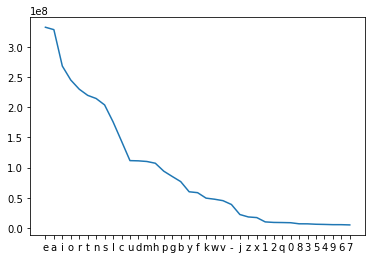

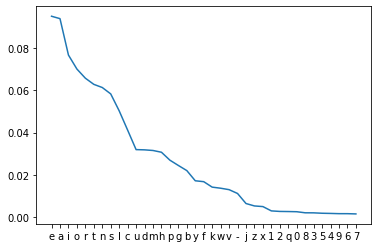

In [87]:
# %matplotlib inline
import matplotlib.pyplot as plot
unigramFile = "/mnt/d/FrequencyCounter/unigram.txt"

readFile = open(unigramFile)

x = []
y = []
ypercent = []
total = 0
count = 0

line = readFile.readline()
while line:
    #print(line,end='')
    strings = line.split(" ")
    x.append(strings[0])
    y.append(int(strings[1]))
    
    total = total + int(strings[1])
    count = count + 1
    line = readFile.readline()

count = 0
while count < len(y):
    ypercent.append(y[count] / total)
    count = count + 1
    
plot.plot(x, y)
plot.show()

#they should visually be the same, just different axis values

plot.plot(x, ypercent)
plot.show()